<a href="https://colab.research.google.com/github/hxdya/MMU-intro/blob/master/step1_Download_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logos](https://github.com/Lodur03/ManGAN/blob/master/header.png?raw=true)


All data will be downloaded from [safebooru](http://safebooru.org/). Since it contains mostly colored images, I will be saving the original version a standard size (512x512) and also a *"line-art version"* that will be obtained through edge detection.


### Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Data Viz
import matplotlib.pyplot as plt

# Scrap
import untangle
import urllib3
import urllib
import json

# Manipulation
import numpy as np
import cv2

# need to pip install untangle, and change urllib2 to urllib3 

In [10]:
pip install urllib3

### Auxiliary Functions

To show the download progress:

In [16]:
def progress_bar(iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█'):
    ''' display iteration progress by overwriting sysout '''
    
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print ('\r%s |%s| %s%% %s\r' % (prefix, bar, percent, suffix))

    if iteration == total: 
      print ("Finished")

# ERROR: add bracket to print 

Mantaining standard proportion (*n x n*):

In [77]:
def img_cropping(image, height, width):
    '''make image n x n'''
    if(height > width):
        scalefactor = (maxsize*1.0) / width
        res = cv2.resize(image,(int(width * scalefactor), int(height*scalefactor)), interpolation = cv2.INTER_CUBIC)
        cropped = res[0:maxsize,0:maxsize]
    elif(width > height):
        scalefactor = (maxsize*1.0) / height
        res = cv2.resize(image,(int(width * scalefactor), int(height*scalefactor)), interpolation = cv2.INTER_CUBIC)
        center_x = int(round(width*scalefactor*0.5))
        cropped = res[0:maxsize,center_x - int(maxsize/2):center_x + int(maxsize/2)]
    else:
        cropped = image
        
    return cropped

## Collect

Params to change:

In [104]:
save_dir = r"C:\imgs" # replace with directory to save images 
total_it = 10         # how many scrap iterations
maxsize = 512         # images will be maxsize x maxsize

In [38]:
from urllib. request import urlopen
from io import BytesIO



Download it:

In [46]:
pip install untangle


In [64]:
import untangle
import urllib.request as ur


In [99]:
dataset = ["https://safebooru.org/samples/3577/sample_655e6111c725d3690ec87a08398b394cb7b8a64b.jpg",
         "https://safebooru.org/samples/3577/sample_8d357b8c126104e8278d2d6e0617b01436c6f2b0.jpg",
         "https://safebooru.org/images/3577/e49fdf2623dfbd1dd2a69d524a690c3d0a930722.jpg",
         "https://safebooru.org/samples/3577/sample_84d4887a286f3342ee811f5ee72f853f5238c84b.jpg",
         "https://safebooru.org/samples/3577/sample_330ed0fc51b2b9eb8616d45e29a4fa04c9114e44.jpg",
         "https://safebooru.org/images/3577/15e60e81db23548810294a5c51aa0c995097f055.png",
         "https://safebooru.org/samples/3577/sample_fbc97f7fac9d9668dac5d832392255975ef7cdb9.jpg",
         "https://safebooru.org/images/3577/f6066613ffc5a6398e453beb4cfc267d7f656a4d.jpg",
         "https://safebooru.org/samples/3577/sample_9397b7743d94a288e21d2b69b00e1ce8abc09ef3.jpg",
         "https://safebooru.org/images/3577/ba8be7dcba93326125f10ea3fd284885b6982af3.png",
         "https://safebooru.org/samples/3577/sample_90bea0a700ff15eb8a40b793233b31fadb6b4ef1.jpg",
         "https://safebooru.org/samples/3577/sample_6b511c8009fdf06e9ac2ef1123a544160b9b5c82.jpg",
         "https://safebooru.org/samples/3577/sample_96516afe935427b9078bfbb371e108d871579b9a.jpg",
         "https://safebooru.org/samples/3577/sample_fb0e0a1586dd204b83785c236cdd2d13af08c0fb.jpg",
         "https://safebooru.org/samples/3577/sample_f1830677fdcd5795a1237207662a2f083ab26516.jpg",
         "https://safebooru.org/samples/3577/sample_5b5673abe6630e29abe472863db393b3e8da113a.jpg",
         "https://safebooru.org/samples/3577/sample_eafa2317b739a412d2ab24f13c63a828e7f7a675.jpg",
         "https://safebooru.org/images/3577/3129ca1ffce760c6f484441da2b677ba0f63058f.jpg",
         "https://safebooru.org/images/3577/9e6afd1c240dfc56f87c4cdf76e1bacfbc657d48.jpg" ,
         "https://safebooru.org/images/3577/35895c1d283ef2d1a5e175d9f08c034972cea766.png",
         "https://safebooru.org/images/3577/0aae34db7e5401816f1ee5080e10c056deea1382.jpg",
         "https://safebooru.org/images/3577/27c015ce75cf0db40fabf9a05aae367ec3cca96f.jpg",
         "https://safebooru.org/samples/3577/sample_5c1e077f77b96174bd4c0164fa981325f7b6d245.jpg",
         "https://safebooru.org/images/3577/71582ba5300472e96a795fd0481c2b81e71ff93f.png",
         "https://safebooru.org/samples/3577/sample_603c39832644524f385e0b41878d6bcf4e007163.jpg",
         "https://safebooru.org/samples/3577/sample_635d4c908b90897d1821dee8486413504ab5d4a1.jpg",
         "https://safebooru.org/images/3577/c6f1f70edc2553c0fb08aad4ad0743c568f5a0de.png",
         "https://safebooru.org/samples/3577/sample_95c13ce19bb0eacf2bd59281f3f9f7505006fefd.jpg",
         "https://safebooru.org/samples/3577/sample_9c20fb65032f41e7689156ae8b1c44bdd4b1d270.jpg",
         "https://safebooru.org/samples/3577/sample_5913065cff1c18f06517ff3be70878d7e0419a7e.jpg",
         "https://safebooru.org/images/3577/91ca4fa70c080283bb0dbe6183ec413f590be45a.png",
         "https://safebooru.org/samples/3577/sample_690eefdc108ae88327ccdb17d2ff60a0ebbaa2dc.jpg",
         "https://safebooru.org/samples/3577/sample_8b027a9a316c2c0c0806ef7e82e1feb9594dbde3.jpg",
         "https://safebooru.org/samples/3577/sample_58d68e942092b402b80f6965372fa43588833733.jpg",
         "https://safebooru.org/samples/3577/sample_e87525aa765c67dfe8b40804669d1200d7e5a215.jpg",
         "https://safebooru.org/images/3577/fc6de010a984fef0878c6a935aa3d041411f92c7.jpg",
         "https://safebooru.org/samples/3577/sample_e2eb18c63837407f2854ca58410ab069945fe463.jpg",
         "https://safebooru.org/images/3577/6eb8c8ff76f79e5e716e6328e8fd87609be222bf.jpg",
         "https://safebooru.org/samples/3577/sample_1409b3d35bc6def0768c08330aed134d0688902a.jpg",
         "https://safebooru.org/images/3577/862e56c9547884df885bfcb57f94a42348ebca84.jpg",
         "https://safebooru.org/samples/3576/sample_a56c21790b26962c63703a9d2347ad67efc15ce8.jpg",
         "https://safebooru.org/images/3576/89cef59029a5fcca40c9bb8096a4a8d01300bcc0.jpg",
         "https://safebooru.org/images/3576/1d4ebc03d39403a052ba003d2e71ed206df8244a.jpg",
         "https://safebooru.org/samples/3576/sample_7b98d97f81489ab2c9da50773fb5ca710ccdd6e8.jpg",
         "https://safebooru.org/samples/3576/sample_8c457a12ab43595a968ed6a92dd2f99877bb1722.jpg"]


In [106]:
scrap_url = "http://safebooru.org/index.php?page=dapi&s=post&q=index&tags=1girl%20solo&pid="
count = 1
for x in range(len(dataset)):
  
  imgurl = dataset[x]

  if ("png" in imgurl) or ("jpg" in imgurl): # for each image url, save it

      resp = ur.urlopen(imgurl)
      image = np.asarray(bytearray(resp.read()), dtype="uint8")
      image = cv2.imdecode(image, cv2.IMREAD_COLOR)
      height, width = image.shape[:2]
      
      cropped = img_cropping(image, height, width)
      img_grey = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
      img_edge = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=9, C=2)
      
      # Save colored image
      cv2.imwrite(save_dir+r'\imgs'+str(count)+".jpg", cropped)
      
      # Save edge image
      cv2.imwrite(save_dir+r'\imgs'+str(count)+"-edge.jpg", img_edge)
      count = count + 1


We can visualize a couple images. To make it easy, let's first create a helper function:

In [87]:
def viz_images(names, figsize=(15,15), columns=4, rows=1 ):
    ''' Receives four image names in a list to plot from save_dir'''
    fig=plt.figure(figsize=figsize)

    for i in range(1, columns*rows + 1):
        
        bgr_img = cv2.imread(save_dir + names[i-1])
        img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)

    plt.show()

Now that it's done, start by showing a couple examples:

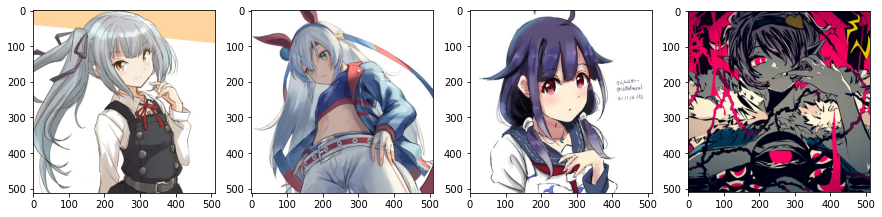

In [107]:
img_colored = [r'\imgs1.jpg', r'\imgs12.jpg', r'\imgs13.jpg', r'\imgs14.jpg']
viz_images(img_colored)

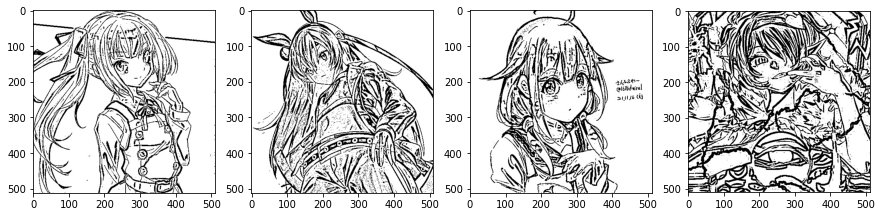

In [109]:
img_edge = [r'\imgs1-edge.jpg', r'\imgs12-edge.jpg', r'\imgs13-edge.jpg', r'\imgs14-edge.jpg']
viz_images(img_edge)

And now the data is collected. :)